# Code aus den Folien

Jede Box enthält die Codebeispiele aus den Folien. Bitte zunächst diese Box ausführen, um alle nötigen Imports zu erhalten, davon ab ist jede Folie unabhängig voneinander ausführbar.

In [1]:
# Ausführen, um alle nötigen Module zu laden
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

from pprint import pprint
from IPython import display

## Folie 6 -"Minimales Beispiel"

In [2]:
# Clear nodes generated by other codeblocks
tf.reset_default_graph()

a = tf.constant(3)
b = tf.constant(14, dtype='int32')

c = tf.multiply(a, b, name='awesome_multiplication')
# oder: c = a * b

sess = tf.Session()
result = sess.run(c)
tf.summary.FileWriter('./logdir/slide6', sess.graph)
print(result)

42


## Folie 10 - "Placeholder"

In [3]:
# Clear nodes generated by other codeblocks
tf.reset_default_graph()

a = tf.placeholder(dtype='int32')
b = tf.constant(10)

c = a * b

sess = tf.Session()
result = sess.run(c, feed_dict={a: 30})
tf.summary.FileWriter('./logdir/slide10', sess.graph)
print(result)

300


## Folie 12 - "Variablen"

In [4]:
# Clear nodes generated by other codeblocks
tf.reset_default_graph()

v = tf.get_variable('my_variable', shape=[2, 3])
b = tf.constant(10, dtype='float32')

c = v * b

sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(c)
tf.summary.FileWriter('./logdir/slide12', sess.graph)
print(result)

[[  1.67396903 -10.18246651  -6.58097029]
 [ -1.54325664  -2.06326008   2.31209636]]


## Ab Folie 12 - "MNIST"
Siehe auch https://www.tensorflow.org/get_started/mnist/beginners

Laden der Beispieldaten, die Vorverarbeitung wurde für uns übernommen

In [5]:
# Clear nodes generated by other codeblocks
tf.reset_default_graph()

mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


Das Modell. Wir multiplizieren die Eingabedaten mit den Gewichten und addieren anschließend den Bias

In [6]:
# Eingabebild
x = tf.placeholder(tf.float32, [None, 784], name='images')
# Tatsächliches Label
y_ = tf.placeholder(tf.float32, [None, 10], name='labels')
# Gewichte
W = tf.Variable(tf.zeros([784, 10]), name='weights')
# Bias
b = tf.Variable(tf.zeros([10]), name='bias')

# Vorhersage (noch ohne Softmax Funktion)
with tf.name_scope('fully_connected_layer'):
    y = tf.matmul(x, W) + b

Berechnung des Fehlers

In [7]:
# Mittlerer Fehler
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
          tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    )
# Für TensorBoard
tf.summary.scalar('loss', cross_entropy)
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Berechnung der Genauigkeit unseres Modells - wie oft liegen wir richtig mit unserer Vorhersage?

In [8]:
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Für TensorBoard
tf.summary.scalar('accuracy', accuracy)
merged_summaries = tf.summary.merge_all()

In [9]:
sess = tf.Session()
train_writer = tf.summary.FileWriter('./logdir/mnist/train', sess.graph)
test_writer = tf.summary.FileWriter('./logdir/mnist/test')

sess.run(tf.global_variables_initializer())

Training with TensorBoard logging

In [10]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_summary, _ = sess.run([merged_summaries, optimizer], feed_dict={x: batch_xs, y_: batch_ys})
    train_writer.add_summary(train_summary, i)
    test_summary = sess.run(merged_summaries, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    test_writer.add_summary(test_summary, i)
    if i % 100 == 0:
        print('Training step {:4} / 1000'.format(i))

Training step    0 / 1000
Training step  100 / 1000
Training step  200 / 1000
Training step  300 / 1000
Training step  400 / 1000
Training step  500 / 1000
Training step  600 / 1000
Training step  700 / 1000
Training step  800 / 1000
Training step  900 / 1000


Output test accuracy

In [11]:
sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9152

## Folie 24 - Bilderkennung

In [12]:
# Clear nodes generated by other codeblocks
tf.reset_default_graph()

image = tf.contrib.keras.preprocessing.image
vgg16 = tf.contrib.keras.applications.vgg16
model = vgg16.VGG16()

sess = tf.Session()
tf.summary.FileWriter('./logdir/slide24', sess.graph)

img = image.load_img('cat.jpg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

predictions = model.predict(x)

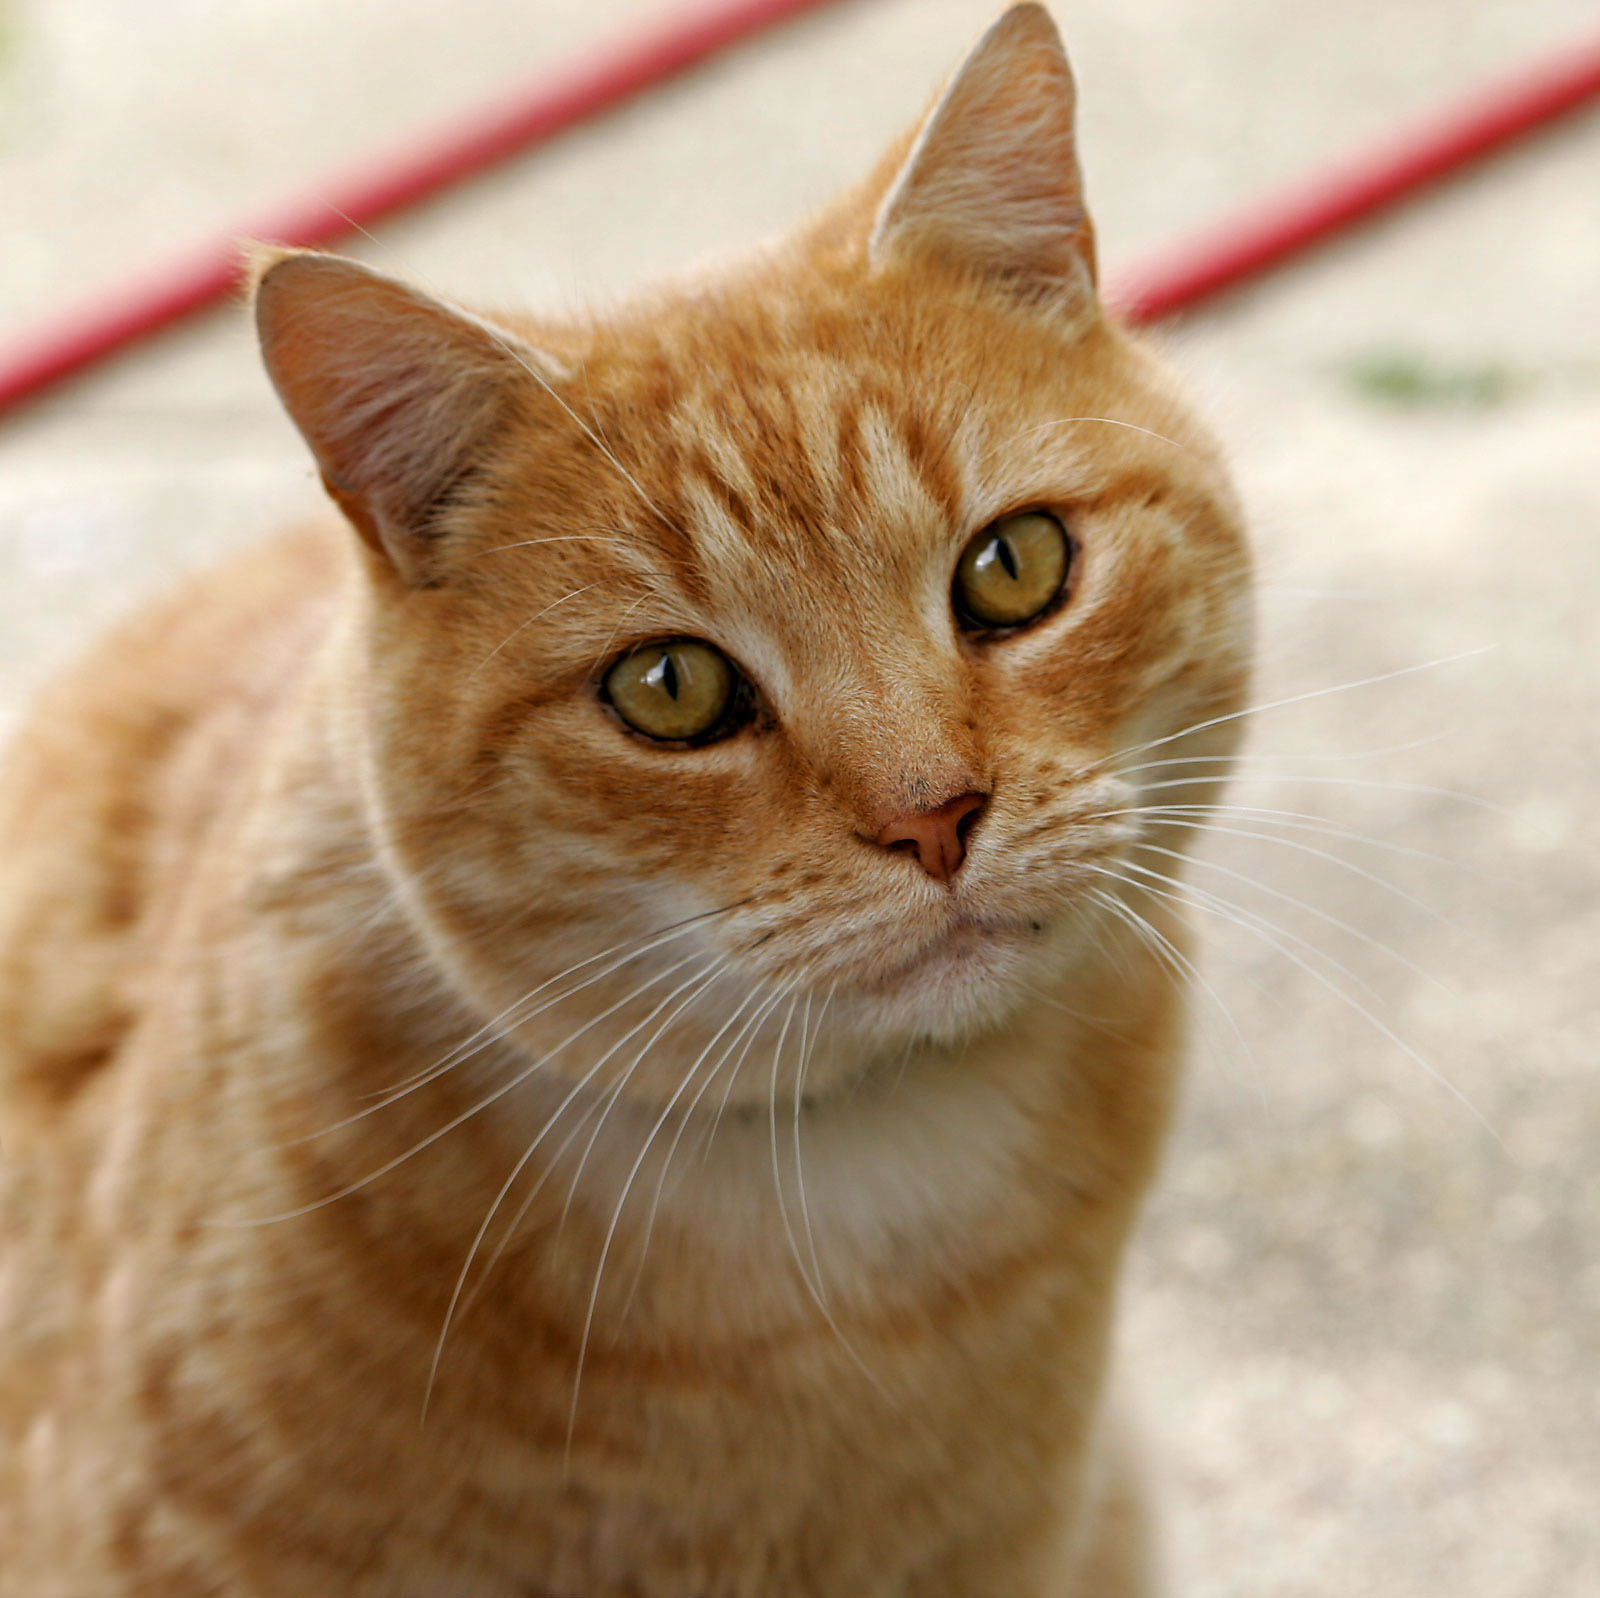

In [13]:
display.Image('cat.jpg', width=250)

In [14]:
pprint(vgg16.decode_predictions(predictions))

[[('n02123159', 'tiger_cat', 0.43690097),
  ('n02124075', 'Egyptian_cat', 0.32366198),
  ('n02123045', 'tabby', 0.1447085),
  ('n02127052', 'lynx', 0.019589322),
  ('n07930864', 'cup', 0.0077141393)]]


## Und nicht vergessen

    tensorboard --logdir=logdir
    
…und dann ab nach http://localhost:6006